# 量子コンピューティング向け線形代数入門

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from qiskit import *
from qiskit.visualization import plot_bloch_vector

**序論**

線形代数は、量子コンピューティングの言語です。 このため、量子計算の驚くべき、かつおもしろい数多くの構造にたどり着くためには、その構造を構築する基本的な数学的概念を十分に理解することが肝要となります。このセクションの目的は、読者が量子コンピューティングの研究において活用できるようになるまで、基礎線形代数に関する知識の基盤を構築することにあります。

**ベクトルとベクトル空間**

まずは、量子計算において最も重要な数学量の1つであるベクトルについて議論することから、基礎線形代数の探究を始めましょう。

正式には、 **ベクトル** $|v\rangle$ は、ベクトル空間として知られる集合の元として定義されています。 より直感的で幾何学的な定義では、ベクトルは「方向と大きさの両方を持つ数学的な量」になります。 例えば、 $x$ と $y$ 要素を持つベクトル $\begin{pmatrix} 3 \\ 5 \end{pmatrix}$ を考えましょう。このベクトルは、 $x$ 軸方向に $3$ 単位と $y$軸方向に $5$ 単位を指す矢印として表示できます：

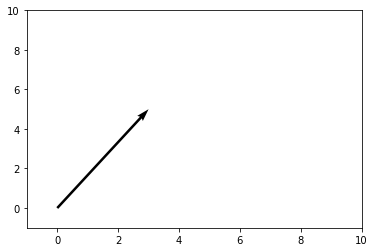

In [2]:
plt.figure()
ax = plt.gca()
ax.quiver([3], [5], angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()
plt.show()

ベクトルの「始点」を原点に配置する必要がないことに注意してください。重要なのは、正しい方向を指していることです。

量子コンピューティングでは、しばしば **状態ベクトル** を扱います。状態ベクトルは、特定の量子状態に対応する空間内の特定の点を指します。 これは、しばしばブロッホ球を使用して可視化されます。 例えば、量子系の状態を表すベクトルは、ブロッホ球に囲まれたこの矢印のように見えます。これは、状態ベクトルが「指し示せる」すべての点の集合、いわゆる「状態空間」です：

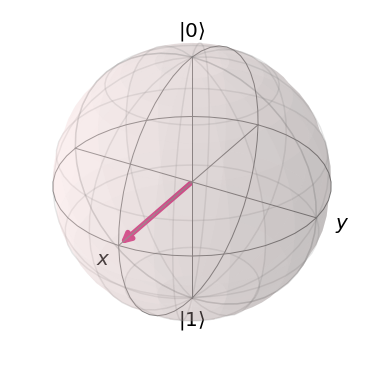

In [3]:
plot_bloch_vector([1, 0, 0])

この状態は、 $|0\rangle$ と $|1\rangle$ を等しく重ね合わせたものに対応します(矢印は、球の上部である $|0\rangle$ と下部である $|1\rangle$ の間にありますよね)。ベクトルは球の表面のどこにでも回転させることができ、それぞれの点は異なる量子状態を表しているのです。

ベクトルのより正式な定義、ベクトルはベクトル空間の元であることに立ち戻りましょう。ここでまず、ベクトル空間を定義しなければなりません。 **体** F上の **ベクトル空間** $V$ は、以下の2つの条件を満たすオブジェクト (ベクトル) の集合です。 1つ目の条件は、2つのベクトル$|a\rangle, \ |b\rangle \ \in \ V$ の **ベクトル加算** は、$V$に含まれる3番目のベクトル $|a\rangle \ + \ |b\rangle \ = \ |c\rangle$を生じること、2つ目の条件は、ある$|a\rangle \ \in \ V$ とある $n \ \in \ F$の**スカラー乗算**が、$n|a\rangle$ と表現でき、かつ$V$に含まれること、です。 

では、基本的な例を使用して、上の定義を確認しましょう。 体 $\mathbb{R}$ 上の集合 $\mathbb{R}^2$ がベクトル空間であることを証明します。まず：
<br>


$$\begin{pmatrix} x_1 \\ y_1 \end{pmatrix} \ + \ \begin{pmatrix} x_2 \\ y_2 \end{pmatrix} \ = \ \begin{pmatrix} x_1 \ + \ x_2 \\ y_1 \ + \ y_2 \end{pmatrix}$$


<br>

が、$\mathbb{R}^2$ に含まれることを証明しましょう。まず、2つの実数の和は実数であり、新たに形成されたベクトルの両方の構成要素が実数になることから、これは明らかです。すなわち、このベクトルは $\mathbb{R}^2$ に含まれています。また：

<br>


$$n |v\rangle \ = \ \begin{pmatrix} nx \\ ny \end{pmatrix} \ \in \ V \ \ \ \ \forall n \ \in \ \mathbb{R}$$


<br>

が$\mathbb{R}^2$ に含まれることも証明しましょう。実数と実数の積は実数であり、新たなベクトルの値が実数になるので、この命題を証明できます。

**行列と行列演算**

次の基本概念である**行列**に関心を向けましょう。行列はベクトルを他のベクトルに変換する数学的オブジェクトです：

<br>


$$|v\rangle \ \rightarrow \ |v'\rangle \ = \ M |v\rangle$$


<br>

一般的に、行列は次のような形で、数の「配列」として記述されます：

<br>


$$M \ = \ \begin{pmatrix} 1 & -2 & 3 \\ 1 & 5i & 0 \\ 1 \ + \ i & 7 & -4 \end{pmatrix}$$


<br>

行列の乗算を実行することで、行列をベクトルに「適用」することができます。 一般的に、2つの行列の乗算とは、1つ目の行列の最初の行を取り、 2つ目の行列の最初の列にある各「パートナー」要素と乗算(行の最初の数値は列の最初の数値、行の2番目の数値は列の2番目の数値……と乗算)することからなります。これらの乗算された数字は足し合わされ、新しい行列の最初の行の最初の要素になるのです。最初の行の残りの部分に入力するには、2つ目の行列の 2番目、3番目……の列に対してこのプロセスを繰り返します。 次に、1つ目の行列の2番目の行を取り、 2つ目の行列の各列についてこのプロセスを繰り返し、 2番目の行を取得します。1つ目の行列のすべての行について、このプロセスを実行します。その結果の行列が、私たちの求める新しい行列です。例を示しましょう：

<br>


$$\begin{pmatrix} 2 & 0 \\ 5 & -1 \end{pmatrix} \begin{pmatrix} -3 & 1 \\ 2 & 1 \end{pmatrix} \ = \ \begin{pmatrix} (2)(-3) + (0)(2) & (2)(1) \ + \ (0)(1) \\ (5)(-3) + (-1)(2) & (5)(1) \ + \ (-1)(1) \end{pmatrix} \ = \ \begin{pmatrix} -6 & 2 \\ -17 & 4 \end{pmatrix}$$


<br>

ご覧の通り、前に説明したプロセスだけを使って最終的な行列に到達できました。「行列」をベクトルに適用するという点に立ち戻ると、ベクトルは単に$1$列の行列と解釈できるので、行列の乗算はベクトルと全く同じように振る舞うことがお分かりになると思います。量子コンピューティングの世界には、量子計算を実行するために操作する量子状態ベクトルというものがあります。ベクトルは単に1列の行列と解釈できます。行列をベクトルに適用するには、上記と同じ行列の乗算手順に従います。私たちは実際、連続した**量子ゲート**を適用することで量子コンピュータ内の量子ビットを操作します。 各量子ゲートは、状態ベクトルに適用できる行列として表現できるため、状態が変化します。 例えば、最もよく知られる量子ゲートの1つはPauli-Xゲートであり、これは以下の行列によって表現されます： 
<br>


$$\sigma_x \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$


<br>

このゲートは、古典的なNOT論理ゲートと同様に機能します。計算基底状態である $|0\rangle$ を $|1\rangle$ に、 $|1\rangle$ を $|0\rangle$ にマップ (状態を「反転」)します。 実際の列ベクトルとして、以下の2つの基底状態を定義します；

<br>


$$|0\rangle \ = \ \begin{pmatrix} 1 \\ 0 \end{pmatrix} \ \ \ \ \ \ \ |1\rangle \ = \ \begin{pmatrix} 0 \\ 1 \end{pmatrix}$$


<br>

このとき、この行列をそれぞれのベクトルに適用すると：

<br>


$$\sigma_x |0\rangle \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} \ = \ \begin{pmatrix} (0)(1) \ + \ (1)(0) \\ (1)(1) \ + \ (0)(0) \end{pmatrix} \ = \ \begin{pmatrix} 0 \\ 1 \end{pmatrix} \ = \ |1\rangle$$


<br>


$$\sigma_x |1\rangle \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} \ = \ \begin{pmatrix} (0)(0) \ + \ (1)(1) \\ (1)(0) \ + \ (0)(1) \end{pmatrix} \ = \ \begin{pmatrix} 1 \\ 0 \end{pmatrix} \ = \ |0\rangle$$


<br>

となります。この行列が、状態ベクトルに対して期待通りに動作していることが確認できました。

しばしば量子計算では、**エルミート行列**と**ユニタリ行列**という、2つの非常に重要な行列を扱います。前者は量子力学の研究においてより重要ですが、量子計算の研究で議論するためにも依然として必要です。後者は、量子力学と量子計算の両方において、比類のない重要性を持ちます。もし読者がこの線形代数のセクションから持ち帰るべきものが一つあるとしたら、それはユニタリ行列の考え方です。

まず、エルミート行列とは、その**共役転置**( $\dagger$ 記号を使用して表現されます)が自分自身と等しい行列を言います。つまり、エルミート行列の虚数成分の符号を反転させ、その行列の要素を正対角線(左上隅から右下隅への対角線)で折り返すと、同じ行列が生成されます。例えば、量子計算で一般的に使用される行列であるPauli-Y行列は、エルミート行列です：

<br>


$$\sigma_y \ = \ \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \ \Rightarrow \ \sigma_y^{\dagger} \ = \ \begin{pmatrix} 0 & -(i) \\ -(-i) & 0 \end{pmatrix} \ = \ \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \ = \ \sigma_y$$


<br>


どのように$i$ と $-i$ の場所を切り替えたか (正対角線に対し反転しているため、ゼロは変更されていない)に注意してから、符号を反転させます。

ユニタリ行列はこれととてもよく似ています。 具体的には、ユニタリ行列とは、元の行列の共役転置行列が**逆行列**と等しい行列を言います。

ある行列 $A$ の逆行列 $A^{-1}$ とは、以下のような行列を言います：
<br>


$$A^{-1} A \ = \ A A^{-1} \ = \ \mathbb{I}$$


<br>

ここで、$ \mathbb{I} $ は単位行列です。 単位行列とは、正対角線(左上から右下へ)の成分が全て1、それ以外の成分はすべて0である行列です。それが単位行列と呼ばれるのは、それが他の行列に対し明らかに「効果がない」よう作用するからです。単位行列に他の行列を掛けることで、これを自分で証明できます。

行列が $2 \ \times \ 2$ より大きくなると、逆行列の計算は非常に複雑になり、計算は通常コンピューターに任されます。 $2 \ \times \ 2$ 行列の逆行列は、以下のように定義されます：

<br>
$$A \ = \ \begin{pmatrix} a & b \\ c & d \end{pmatrix} \ \Rightarrow \ A^{-1} \ = \ \frac{1}{\text{det} \ A} \begin{pmatrix} d & -b \\ -c & a \end{pmatrix},$$
<br>

ここで、$\text{det} \ A$ は行列の**行列式**です。$2 \ \times \ 2$の行列では、$\text{det} \ A \ = \ ad \ - \ bc$ になります。

量子コンピューティングにおいて、逆行列の計算はあまり重要ではありません。扱う行列の大部分はユニタリなので、逆行列は単に共役転置することで得られます。煩わしい処理を通じて、逆行列を厳密に計算する必要はないのです。

基本的な例を見てみましょう。 Pauli-Y行列は、エルミートかつユニタリです。つまり、Pauli-Y行列はその共役転置と等しく、その逆行列とも等しいのです。この行列が実際にユニタリであることを確認しましょう：

<br>


$$\sigma_y \ = \ \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \ \ \ \ \ \sigma_y^{\dagger} \ = \ \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \ \Rightarrow \ \sigma_y^{\dagger} \sigma_y \ = \ \begin{pmatrix} (0)(0) + (-i)(i) & (0)(-i) \ + \ (-i)(0) \\ (i)(0) \ + \ (0)(i) &  (i)(-i) \ + \ (0)(0) \end{pmatrix} \ = \ \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \ = \ \mathbb{I}$$


<br>

ユニタリ行列が重要である理由は、ヒルベルト空間のセクション及び本教科書の量子力学サブトピックでさらに明らかになります。基本的な考え方は、ユニタリ行列の適用による量子状態の発展を、ある意味量子状態に「保存」することにあります。

**スパン集合、線形従属、そして基底**

ベクトル空間の構築について議論する場にやってきました。あるベクトル空間 $V$ を考えましょう。スパン集合に含まれるベクトルの**線形結合**として部分空間内の全てのベクトルが記述できるとき、ベクトルのある集合 $S$ は、ベクトル空間の部分空間 $V_S \ \subset \ V$ （ベクトル空間演算の下で閉じた部分集合）を張る(span)と言います。

場 $F$ 上のあるベクトル空間内のベクトル $|v_1\rangle, \ ..., \ |v_n\rangle$ の線形結合は、これらのベクトルの任意の合計として定義されます（もちろんこれは、別のベクトルとなり、$|v\rangle$と呼ぶこととします）：

<br>


$$|v\rangle \ = \ f_1 |v_1\rangle \ + \ f_2 |v_2\rangle \ + \ ... \ + \ f_n |v_n\rangle \ = \ \displaystyle\sum_{i} \ f_i |v_i\rangle$$


<br>

ここで、$f_i$ は$F$の要素です。ですので、空間を張るベクトルの集合があるとき、ベクトル空間内の**他の任意のベクトル** は、これらのベクトルの線形結合で記述できると、簡潔に言うことにしましょう。

ベクトル $|v_1\rangle, \ ..., \ | v_n\rangle$ の集合は、以下のようなそれぞれのベクトルに対応する係数 $b_i \ \in \ F$が存在する場合、**線形従属**していると言います：

<br>

$$b_1 |v_1\rangle \ + \ b_2 |v_2\rangle \ + \ ... \ + \ b_n |v_n\rangle \ = \ \displaystyle\sum_{i} \ b_i |v_i\rangle \ = \ 0,$$

<br>

ここで、少なくとも一つの係数 $b_i$ はゼロではありません。これは、「ベクトルの集合は互いの線型結合として表現できる」という、より直感的な表現と同等です。例えば、集合 ${| v_1\rangle, \ ..., \ | v_n\rangle }$ と、線形結合が $0$ に等しい対応する係数 ${|b_1\rangle, \ ..., \ | b_n\rangle } $ があるとします。ゼロではない係数を持つベクトルが少なくとも1つ存在するので、その項を線形結合 $b_a |v_a\rangle$とします。
<br>


$$\displaystyle\sum_{i} \ b_i |v_i\rangle \ = \ b_a |v_a\rangle \ + \ \displaystyle\sum_{i, \ i \ \neq \ a} \ b_i |v_i\rangle \ = \ 0 \ \Rightarrow \ |v_a\rangle \ = \ - \displaystyle\sum_{i, \ i \ \neq \ a} \ \frac{b_i}{b_a} |v_i\rangle \ = \ \displaystyle\sum_{i, \ i \ \neq \ a} \ c_i |v_i\rangle$$


<br>

ゼロでない係数が$b_a$だけの場合、$|v_a\rangle$がヌルベクトルになり、自動的に集合が線形従属になることは必然的に真です。もしそうでない場合、上で示されたように、$|v_a\rangle$ はゼロでないベクトルの線形結合として記述されます。その逆を証明するために、部分空間内の他のベクトルの線形結合として記述することができる部分空間 $|v_1\rangle, ..., \ |v_n\rangle$ 内に、あるベクトル $|v_a\rangle$ が存在すると仮定します。つまり：

<br>

$$|v_a\rangle \ = \ \displaystyle\sum_{s} b_s |v_s\rangle$$

<br>

ここで、$s$ は部分空間のサブセット上で有効な添字です。すると：

<br>


$$|v_a\rangle \ - \ \displaystyle\sum_{s} b_s |v_s\rangle \ = \ |v_a\rangle \ - \ (|v_{s_1}\rangle \ + \ ... \ + \ |v_{s_r}\rangle) \ = \ 0$$


<br>

添字$s$のサブセットに含まれない部分空間内の全てのベクトルに対して、係数（添字 $q$ ）を $0$ に等しいとします。すなわち、

<br>

$$|v_a\rangle \ - \ (|v_{s_1}\rangle \ + \ ... \ + \ |v_{s_r}\rangle) \ + \ (0)(|v_{q_1}\rangle \ + \ ... \ + \ |v_{q_t}\rangle) \ = \ 0$$

<br>

これは、部分空間 $|v_1\rangle, \ ..., \ | v_n\rangle$ のすべての元の線形結合であり、それが $0$に等しいことを意味します。つまり、2つの線形依存関係の定義がお互いを意味していることの証明が完了しました。

では、基本的な例を考えましょう。$\mathbb{R}^2$ 内の2つのベクトル、$|a\rangle \ = \ \begin{pmatrix} 1 \ 0 \end{pmatrix}$ と $|b\rangle \ = \ \begin{pmatrix} 2 \ 0 \end{pmatrix}$、の集合を考えます。$\mathbb{R}$となるベクトル空間上の場を選んだとき、$0$となるようなベクトルの線形結合を生成することができます。例えば
<br>


$$2|a\rangle \ - \ |b\rangle \ = \ 0$$


<br>

集合内の他のベクトルの線形結合として表現できないベクトルの集合を、**線形独立**と言います。

**基底** の概念は、単純に **線型独立なスパン集合** です。 この意味で、ベクトル空間の基底は、空間全体に張ることのできる最小の集合です。基底集合のサイズを、ベクトル空間の**次元**と呼びます。

基底とスパン集合が非常に重要である理由は、ベクトル空間を「縮小」することを可能にし、それらを大量ではなく少数のベクトルだけで表現できるからです。空間内のすべてのベクトルは基底ベクトルの線形結合にすぎないことが分かっていますので、基底空間に関する結論をベクトル空間全体に一般化することができます。

量子計算において、私たちがよく扱う基底の1つは、$|0\rangle, \ |1\rangle$です。これらの基底ベクトルの線型結合として、他の任意の量子ビット状態を記述することができます。 例えば、線形結合
<br>


$$\frac{|0\rangle \ + \ |1\rangle}{\sqrt{2}}$$


<br>

は、$|0\rangle$ 基底状態と $|1\rangle$ 基底状態の重ね合わせであり、基底ベクトル状態のいずれかにある状態を測定する確率が等しいことを表しています（線形結合内の「重み」や「各基底ベクトルの量」が等しくどちらも $1/\sqrt{2}$ ですから、ある意味直感的です)。

**ヒルベルト空間、正規直交性、そして内積**

ヒルベルト空間は、量子力学と量子計算における最も重要な数学的構成要素の1つです。厳密度を下げると、ヒルベルト空間はすべての量子状態ベクトルが「生きている」空間状態として考えることができます。 ヒルベルト空間と任意のランダムなベクトル空間とを区別する主な事実は、ヒルベルト空間には、2 つのベクトル間で実行されスカラー値を返す演算、 **内積** が備えられていることです。 


量子力学と量子計算のコンテキストにおいて、 2つの状態ベクトル間の内積は、1番目のベクトルが2番目のベクトルに沿っている量を表すスカラー値を返します。 このことから、特に、異なる量子状態における測定の確率を計算することができます（これは量子力学のサブトピックでより詳しく議論されます）。 

ヒルベルト空間内の2つのベクトル$|a\rangle$ 、 $|b\rangle$に対し、内積を $\langle a | b \rangle$ と記述します。ここで、$\langle a |$ は $|a\rangle$ の共役転置で $|a\rangle^{\dagger}$ とも記述されます。すなわち、ヒルベルト空間内の2つのベクトル間の内積は次のようになります：

<br>

$$\langle a | b \rangle \ = \ \begin{pmatrix} a_1^{*} & a_2^{*} & ... & a_n^{*} \end{pmatrix} \begin{pmatrix} b_1 \\ b_2 \\ . \\ . \\ . \\ b_n \end{pmatrix} \ = \ a_1^{*} b_1 \ + \ a_2^{*} b_2 \ + \ ... \ + \ a_n^{*} b_n$$

<br>

ここで $*$ は、ベクトルの複素共役を表します。

量子系を表すヒルベルト空間の最も重要な条件の一つは、ベクトルのそれ自身の内積が1に等しいことです。つまり、$\langle \psi | \psi \rangle \ = \ 1$です。これはいわゆる正規化条件で、本質的には、ベクトルの二乗の長さ （内積の定義により、ベクトルの各成分を二乗して合計したもの）が1に等しくなければならないことです。この物理的な意味は、特定の方向におけるベクトルの長さは、量子系がその特定の状態で測定される「確率振幅」を表現していることになります。明らかに、量子系が実際に存在する状態で測定される確率は$1$でなければならないことは言うまでもなく、ある特定の状態の量子系を見つける確率の合計は、1に等しいということになります (つまり **ある** 状態になる必要があるということです) 。

ブロッホ球を考えてみましょう：

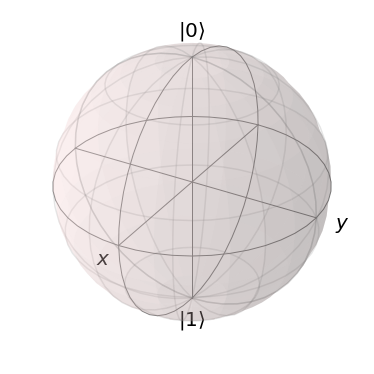

In [4]:
plot_bloch_vector([0, 0, 0])

この球面の表面は、量子ビットの状態ベクトル間の内積とともに、有効なヒルベルト空間になります。これに加えて、ブロッホ球の半径が $1$ であるため、正規化条件が真であることが分かります。従って、各ベクトルの長さの二乗も1と等しくなければなりません。

ヒルベルト空間と内積についての最後の価値は、 **ユニタリ行列**との関係にあります。ユニタリ行列が量子計算において非常に重要である理由は、それらが**内積を保持**するためです。すなわち、ユニタリ行列を用いてベクトルをどのように変換しても、正規化条件は依然として真であることを意味します。 これは、以下の短い証明において実証されます：

<br>


$$\langle \psi | \psi \rangle \ = \ 1 \ \Rightarrow \ |\psi\rangle \ \rightarrow \ U |\psi\rangle \ = \ |\psi'\rangle \ \Rightarrow \ \langle \psi' | \psi' \rangle \ = \ (U |\psi\rangle)^{\dagger} U|\psi\rangle \ = \ \langle \psi | U^{\dagger} U |\psi\rangle \ = \ \langle \psi | \psi \rangle \ = \ 1$$


<br>

これはつまり、ユニタリ発展は、ある量子状態を他の有効な量子状態に変化させることを意味します。ブロッホ球として表現される一量子ビットのヒルベルト空間に対して、ユニタリ変換とは、状態ベクトルの球面上の異なる点への回転に対応し、状態ベクトルの長さを変化させることではないのです。

**固有ベクトルと固有値**

次の形式の関係を考えてみましょう。


$$A |v\rangle \ = \ \lambda |v\rangle$$


ここで $A$ は行列、$\lambda$ はある数値です。ある行列 $A$ が与えられ、上の関係を満たすベクトル $|v\rangle$ および $ \lambda$ を探す必要があるとき、これらのベクトルを **固有ベクトル** 、それぞれのベクトルに対応する係数を **固有値**と呼びます。 固有ベクトルと固有値は、量子力学のコンテキストでは非常に重要な物理的意味を持っており、それはすなわち量子計算というコンテキストにおいても重要ということになります。ある$A$が与えられた時、固有ベクトルと対応する固有値のセットを見つけるために、おもしろいトリックを利用します。 次のように式を書き直してみましょう：

<br>


$$A |v\rangle \ - \ \lambda |v\rangle \ = 0 \ \Rightarrow \ (A \ - \ \lambda \mathbb{I}) |v\rangle \ = \ 0$$


<br>


この方程式の両側を逆行列 $(A \ - \ \lambda \mathbb{I})^{-1}$ で乗算すると、$|v\rangle \ = \ 0$が得られます。これは本質的な解ではありません（固有ベクトルがヌルベクトルであることを許していないですし、どんな固有値/行列の組み合わせも、固有ベクトル-固有値の関係を満たしていません）。 したがって、許される固有ベクトルおよび固有値が存在するためには、行列 $(A \ - \ \lambda \mathbb{I})$は**非可逆**だと仮定しなければなりません。逆行列は、次の形式であることを思い出してください：


<br>
$$M^{-1} \ = \ \frac{1}{\text{det} (M)} \ F(M),$$
<br>

ここで、$F(M)$ は、 $M$ に依存する新しい行列 （行列が実際に存在するかどうかはここでは気にしません）です。 この式で私たちが興味を持つ部分は、行列式の逆数です。行列 $M$ の行列式が $0$ の場合、逆数は定義できず、その逆もそうですので、行列 $M$ は非可逆式になります。したがって、以下が必要となります：

<br>


$$\text{det} (A \ - \ \lambda \mathbb{I}) \ = \ 0$$


<br>

これから、$\lambda$を定義でき、$\lambda$の各値を元の方程式に代入することで固有値を得ることができます! 例として、Pauli-Z行列 $\sigma_z$ の固有ベクトル及び固有値を求めてみましょう。以下の式から始めます：

<br>


$$\text{det} (\sigma_z \ - \ \lambda \mathbb{I}) \ = \ \text{det} \begin{pmatrix} 1 \ - \ \lambda & 0 \\ 0 & -1 \ - \ \lambda \end{pmatrix}  \ = \ (-1 \ - \ \lambda)(1 \ - \ \lambda) \ = \ 1 \ - \ \lambda^2 \ = \ 0 \ \Rightarrow \ \lambda \ = \ \pm 1$$


<br>

行列式を解くときに得られる$\lambda$についてのこの方程式は、**固有多項式** と呼ばれます。そして、これらの値をそれぞれ元の方程式に代入することができます。まず、$\lambda \ = \ 1$ から始めましょう：

<br>


$$\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} |v\rangle \ = \ |v\rangle \ \Rightarrow \ \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} a \\ b \end{pmatrix} \ = \ \begin{pmatrix} a \\ b \end{pmatrix} \ \Rightarrow \begin{pmatrix} a \\ -b \end{pmatrix} \ = \ \begin{pmatrix} a \\ b \end{pmatrix}$$


<br>

つまり、 $a$ は任意の値、 $b$ は $0$ということになります。したがって、ベクトル $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ は、あの関係を満たすすべてのベクトルの基底を形成します。これはつまり、$1$の固有値に対応する固有ベクトルになります。$ \lambda \ = \ -1$に対して同じことをしましょう：


<br>


$$\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} |v\rangle \ = \ -|v\rangle \ \Rightarrow \ \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} a \\ b \end{pmatrix} \ = \ \begin{pmatrix} -a \\ -b \end{pmatrix} \ \Rightarrow \begin{pmatrix} a \\ -b \end{pmatrix} \ = \ \begin{pmatrix} -a \\ -b \end{pmatrix}$$


<br>

今度は、$b$ は任意の数で、$a$ は $0$ です。したがって、 基本ベクトル（ $-1$ に対応する固有ベクトル） は $\begin{pmatrix} 0 \\ 1 \end{pmatrix}$ になります。 Pauli-Z行列の固有ベクトルが、量子計算の基底状態 $|0\rangle$ および $|1\rangle$ であることに注意してください。これは偶然の一致ではありません。 例えば、 $Z$ 基底で量子ビットを測定するということは、量子ビットの状態を、Z行列の固有ベクトル、$|0\rangle$ または $|1\rangle$のどちらか1つに落とし込む測定を実行していることにほかならないのです。


**行列指数関数**


行列指数の概念は、非常に独特なものですが非常に重要な概念です。 次の形式のユニタリ変換を見ることがあります：

<br>
$$U \ = \ e^{i\gamma H},$$
<br>

ここで $H$ はあるエルミート行列で、 $\gamma$ は実数です。この形式のすべての行列がユニタリであることは、とても簡単に証明できます。$U$ の共役転置を取りましょう：
<br>


$$U^{\dagger} \ = \ \Big( e^{i\gamma H} \Big)^{\dagger} \ = \ e^{-i \gamma H^{\dagger}}$$


<br>

しかし、$H$はエルミートですから、 $H^{\dagger} \ = \ H$ です。すなわち：

<br>


$$e^{-i \gamma H^{\dagger}} \ = \ e^{-i \gamma H} \ \Rightarrow \ U^{\dagger} U \ = \ e^{-i \gamma H} e^{i\gamma H} \ = \ \mathbb{I}$$


<br>


あなたはなぜ指数内部にある行列がまだ行列と考えられるのか疑問に思うかもしれません。指数関数をテイラー級数として展開すると、答えがより明確になります。テイラー級数は本質的に任意の関数を無限次数の多項式として書く方法であり、主な考え方は、多項式の項を選び、多項式に変換しようとしている関数上のある点 $x_0$を中心にすることです。つまり、その点での0次、1次、2次、3次……の微分係数が、元の関数と多項式で同じだということです。従って、テイラー級数を次の形式で記述します： 

<br>
$$g(x) \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{(n)}(x_0) \ \frac{(x \ - \ x_0)^n}{n!},$$
<br>

ここで、 $g(x)$ は多項式、 $f(x)$ は元の関数、 $f^{(n)}$ は $f$ の $n$ 次微分、$x_0$ は関数で中心に据えた点です。近似ではないので、$x_0$自身は実は問題ではなく、$x_0 \ = \ 0$とすると、テイラー級数はマクローリン級数になります：

<br>


$$g(x) \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{(n)}(0) \ \frac{x^n}{n!}$$


<br>

そこで、$f(x) \ = \ e^x$とすると、マクローリン級数を使って等価の級数を作成できます。 $e^x$ の微分は単純に $e^x$ であり、明らかに $e^0 \ = \ 1$ ですから、以下のようになります：

<br>


$$g(x) \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{x^n}{n!} \ = \ e^x$$


<br>

つまり、ある行列 $i \gamma H$ について、以下のようになります：

<br>


$$e^{i \gamma H} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(i \gamma H)^n}{n!}$$


<br>

これはより大きなの意味を持ちます。すなわち、行列の指数関数は行列ということです。 これは、行列の冪乗の無限和で、恐れを抱かせるように見えますが、少なくとも、行列指数関数が実際には行列であるという結論に達しました。そして、非常に重要な事実を示す時にやってきました。 $B ^2 \ = \ \mathbb{I}$ （**対合行列**と呼びます） を満たす行列 $B$ について以下を考えます：
<br>


$$e^{i \gamma B} \ = \ \cos(\gamma) \mathbb{I} \ + \ i \sin(\gamma) B$$


<br>

マクローリン級数から始めます：

<br>


$$e^{i \gamma B} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(i \gamma B)^n}{n!}$$


<br>

合計の各項の$n$が偶数か奇数かに応じて、足し合わせを虚数部と実数部に分けられることに注意しましょう：

<br>


$$\displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(i \gamma B)^n}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n \gamma^{2n} B^{2n}}{(2n)!} \ + \ i \displaystyle\sum_{n \ = \ 0}^{\infty} \frac{(-1)^n \gamma^{2n + 1} B^{2n + 1}}{(2n + 1)!}$$


<br>

では、$\sin x$ と $\cos x$ の両方について、マクローリン級数を求めましょう。$f(x) \ = \ \sin x$から始めます：

<br>


$$\sin x \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!}$$


<br>


ご存知のように、$\sin x$ の微分はある意味**循環**しています（それぞれの矢印は前の関数を微分することを表しています）：

<br>


$$\sin x \ \rightarrow \ \cos x \ \rightarrow \ -\sin x \ \rightarrow \ -\cos x \ \rightarrow \ \sin x$$


<br>

$\sin (0) \ = \ 0$ and $\cos (0) \ = \ 1$ですから、偶数 $n$ のすべての項は $0$ になります。

<br>


$$\displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n x^{2n \ + \ 1}}{(2n \ + \ 1)!}$$


<br>

これは元の方程式の奇数項に驚くほど似ています。事実、$x \ = \ \gamma B$ とすると、全く同じになります。偶数項が $f(x) \ = \ \cos x$ の時のマクローリン級数と同一であることを示した時とほぼ同じプロセスを実施します：
<br>


$$\cos x \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!}$$


<br>


$$\Rightarrow \ \cos x \ \rightarrow \ -\sin x \ \rightarrow \ -\cos x \ \rightarrow \ \sin x \ \rightarrow \ \cos x$$


<br>


$$\Rightarrow \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n x^{2n}}{(2n)!}$$


<br>

ここで、元の方程式に戻りましょう。 $B^2 \ = \ \mathbb{I}$ であることを思い出してください。 任意の $n$ に対して、以下が得られます。

<br>


$$B^{2n} \ = \ \big( B^2 \Big)^n \ = \ \mathbb{I}^n \ = \ \mathbb{I}$$


<br>


$$B^{2n \ + \ 1} \ = \ B \ \big( B^2 \Big)^n \ = \ B \ \mathbb{I}^n \ = \ B \ \mathbb{I} \ = \ B$$


<br>

この新情報で全て置き換えると、次が得られます。

<br>


$$\displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n \gamma^{2n} B^{2n}}{(2n)!} \ + \ i \displaystyle\sum_{n \ = \ 0}^{\infty} \frac{(-1)^n \gamma^{2n + 1} B^{2n + 1}}{(2n + 1)!} \ = \ \mathbb{I} \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n \gamma^{2n}}{(2n)!} \ + \ i B \displaystyle\sum_{n \ = \ 0}^{\infty} \frac{(-1)^n \gamma^{2n + 1}}{(2n + 1)!} \ = \ \cos (\gamma) \mathbb{I} \ + \ i \sin (\gamma) B$$


<br>

この事実は量子計算においてとても便利なのです。パウリ行列を考えてみましょう：

<br>


$$\sigma_x \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$


<br>


$$\sigma_y \ = \ \begin{pmatrix} 0 & i \\ -i & 0 \end{pmatrix}$$


<br>


$$\sigma_z \ = \ \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$


<br>

これらの行列は、量子計算にとって非常に重要で、量子ビットを操作するために使われる最も基本的な「量子ゲート」の一部です。 これらの演算子は、ユニタリであるだけでなく、 **エルミート** でもあり **対合** でもあります。 これは、 $e^{i \gamma \sigma_k} \ k \ \in \ \{x, \ y, \ z\}$ の形式の行列が、量子状態ベクトル （量子ビット） に作用できる有効なユニタリ行列であるだけでなく、今証明したばかりのサイン-コサイン関係を使用して表現できることを意味します。 このタイプのゲートが常に使われているように（この教科書の先のセクションで取り上げるように）、この事実は非常に強力であり、量子計算理論を通じて見られるものなのです。

このセクションを終了する前に、 行列指数関数に関して議論すべきもう一つの便利な事実があります。固有ベクトル $|v\rangle$ と対応する固有値 $v$を持つ行列 $M$ があるとき以下が成り立ちます：

<br>


$$e^{M} |v\rangle \ = \ e^v |v\rangle$$


<br>

これは、より簡単に証明することができます：

<br>


$$e^M |v\rangle \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{B^n |v\rangle}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{v^n |v\rangle}{n!} \ = \ e^v |v\rangle$$


<br>

この事実も非常に役立ちます。あるハミルトニアン (特に変分回路）をシミュレートする量子回路を作成する際には、 $e^{i \gamma \sigma_z}$ という形式のゲートが使用されることがよくあります。さて、 $|0\rangle$ および $|1\rangle$ は $\sigma_z$ の固有値ですから、 $e^{i \gamma \sigma_z}$ は、 $|0\rangle$ に $e^{i \gamma}$ の位相を、$|1\rangle$ に $e^{-i\gamma}$の位相を足し合わせるということが、数学的に簡単に確定できます。 これにより、それぞれの計算基底状態に対するゲートの出力を数学的に知ることができるので、$CNOT$ や位相/回転ゲートといったゲートをかなり簡単に構築できるようになるのです。

この事実は、$\sigma_z$ ゲートの指数関数にだけ適用されるのではありません。例えば、 $e^{i \gamma \sigma_x}$ のゲートの結果を、 $\sigma_x$ の固有ベクトル $(|0\rangle \ + \ |1\rangle)/\sqrt{2}$ と $(|0\rangle \ - \ |1\rangle)/\sqrt{2}$の上で確定することもできます。 $\sigma_y$ 行列の指数関数についても同じことが当てはまります。

## 参考文献
[1] Cayley, Arthur. “A Memoir on the Theory of Matrices.” Philosophical Transactions of the Royal Society of London, vol. 148, 1858, pp. 17–37. JSTOR.

[2] A New Branch of Mathematics: The Ausdehnungslehre of 1844 and Other Works: Hermann Grassmann, Lloyd C. Kannenberg: 9780812692761